In [1]:
import numpy as np
import osmnx as ox

%matplotlib inline
np.random.seed(0)
ox.__version__

'1.2.2'

In [4]:
place = "Christchurch, New Zealand"
G = ox.graph_from_place(place, network_type="drive")
Gp = ox.project_graph(G)

In [10]:
# randomly sample n points spatially-constrained to the network's geometry
points = ox.utils_geo.sample_points(ox.get_undirected(Gp), n=100)
X = points.x.values
Y = points.y.values
X0 = X.mean()
Y0 = Y.mean()

In [11]:
# find each nearest node to several points, and optionally return distance
nodes, dists = ox.nearest_nodes(Gp, X, Y, return_dist=True)

In [12]:
# find each nearest edge to several points, and optionally return distance
edges, dists = ox.nearest_edges(Gp, X, Y, return_dist=True)

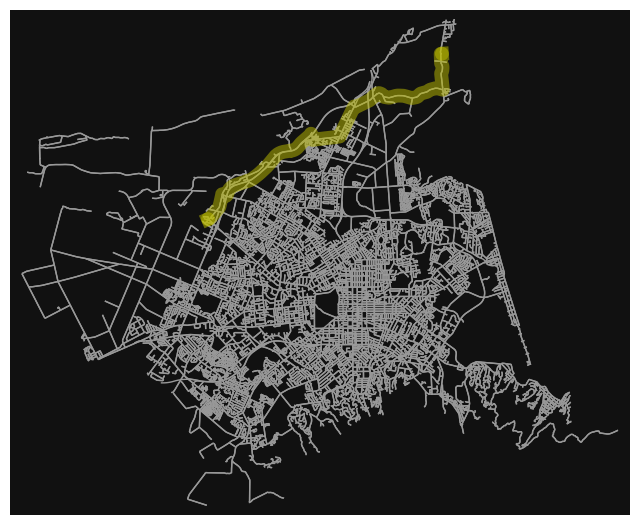

In [17]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[0]
dest = list(G)[220]
route = ox.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=10, node_size=0)

In [18]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

In [19]:
# see mean speed/time values by road type
edges = ox.graph_to_gdfs(G, nodes=False)
edges["highway"] = edges["highway"].astype(str)
edges.groupby("highway")[["length", "speed_kph", "travel_time"]].mean().round(1)

,length,speed_kph,travel_time
highway,,,
"['living_street', 'residential']",219.4,47.8,16.6
"['residential', 'unclassified']",818.2,54.3,53.5
"['secondary', 'tertiary']",37.0,50.0,2.7
"['secondary_link', 'residential']",121.8,50.0,8.8
"['tertiary', 'unclassified']",1280.2,40.0,115.2
living_street,92.1,40.9,9.6
motorway,2058.2,96.5,76.1
motorway_link,349.5,88.0,14.4
primary,135.7,53.6,9.1


In [25]:
# calculate two routes by minimizing travel distance vs travel time
orig = list(G)[1]
dest = list(G)[420]
route1 = ox.shortest_path(G, orig, dest, weight="length")
route2 = ox.shortest_path(G, orig, dest, weight="travel_time")

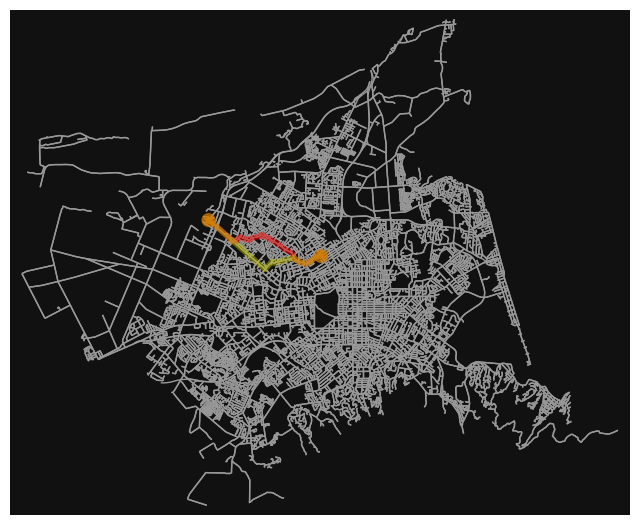

In [26]:
# plot the routes
fig, ax = ox.plot_graph_routes(
    G, routes=[route1, route2], route_colors=["r", "y"], route_linewidth=6, node_size=0
)

In [27]:
# compare the two routes
route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, "length")))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, "length")))
route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, "travel_time")))
route2_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, "travel_time")))
print("Route 1 is", route1_length, "meters and takes", route1_time, "seconds.")
print("Route 2 is", route2_length, "meters and takes", route2_time, "seconds.")

Route 1 is 7353 meters and takes 513 seconds.
Route 2 is 7450 meters and takes 500 seconds.
